<a href="https://colab.research.google.com/github/milenaauzier/Fundamentos_calculo/blob/main/Fun%C3%A7%C3%A3o_%2B_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Matématica - Função Linear

# 📘 Estudo de Funções - Cálculo Básico

### ✅ Função Afim (Linear)

Uma função é o mapeamento de valores de um conjunto para obter respostas válidas em outro conjunto:

Para isso, temos que a função é desenhada da seguinte forma:

A função afim tem a forma:
\[
f(x) = ax + b
\]
- **a:** Coeficiente angular → indica a inclinação da reta.
- **b:** Coeficiente linear → indica onde a reta cruza o eixo y.

### 📈 Comportamento da função:
- Se **a > 0**, a função é **crescente**.
- Se **a < 0**, a função é **decrescente**.
- Se **a = 0**, é uma **reta constante**, sem inclinação.

### Aplicação no Cálculo:
- A inclinação da reta (\(a\)) já é uma forma intuitiva de entender **derivada**, que representa a **taxa de variação** da função.

---


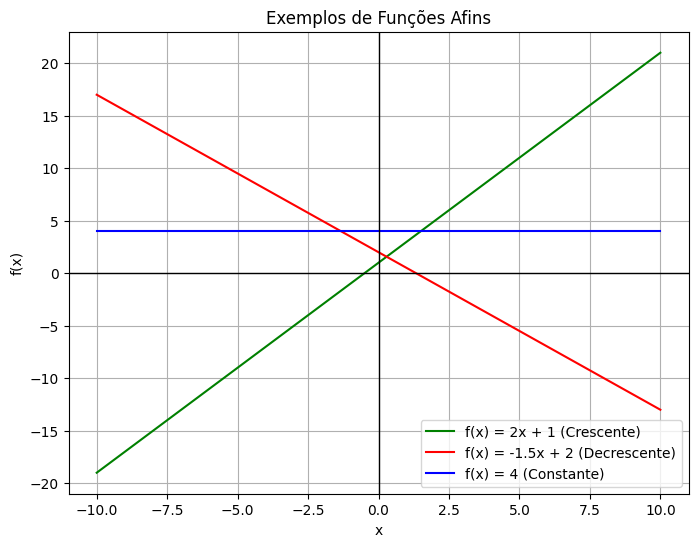

In [2]:
# Definindo o domínio (valores de x)
x = np.linspace(-10, 10, 100)

# Definindo três funções afins:
# Função crescente
y_crescente = 2 * x + 1

# Função decrescente
y_decrescente = -1.5 * x + 2

# Função constante (reta horizontal)
y_constante = 4

# Plotando as funções
plt.figure(figsize=(8,6))

plt.plot(x, y_crescente, label='f(x) = 2x + 1 (Crescente)', color='green')
plt.plot(x, y_decrescente, label='f(x) = -1.5x + 2 (Decrescente)', color='red')
plt.plot(x, [y_constante]*len(x), label='f(x) = 4 (Constante)', color='blue')

# Adicionando eixos
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Títulos e legendas
plt.title('Exemplos de Funções Afins')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

plt.show()


Agora trazendo um exemplo para um contexto mais **econômico!**

1. Imagina que queremos saber como o consumo aumenta quando a renda aumenta - essa relação é verdadeira, certo? mais como explicar essa ideia matematicamente?

In [5]:
#Gerar dados simulados
np.random.seed(42)

# Simular renda mensal (em R$)
renda = np.random.normal(5000, 1500, 100)  # média 5000, desvio 1500

# Garantir que não haja renda negativa
renda = np.maximum(renda, 500)

# Gerar consumo baseado na renda + um ruído aleatório
# Fórmula teórica: consumo = 0.6 * renda + 1500 + erro
consumo = 0.6 * renda + 1500 + np.random.normal(0, 500, 100)

#Gerar dados simulados
np.random.seed(42)

# Simular renda mensal (em R$)
renda = np.random.normal(5000, 1500, 100)  # média 5000, desvio 1500

# Garantir que não haja renda negativa
renda = np.maximum(renda, 500)

# Gerar consumo baseado na renda + um ruído aleatório
# Fórmula teórica: consumo = 0.6 * renda + 1500 + erro
consumo = 0.6 * renda + 1500 + np.random.normal(0, 500, 100)

# Colocar em um DataFrame
df = pd.DataFrame({'Renda': renda, 'Consumo': consumo})

In [6]:
df.head(5)

,Renda,Consumo
0,5745.071230,4239.357367
1,4792.603548,4165.239468
2,5971.532807,4911.562426
3,7284.544785,5469.588236
4,4648.769938,4208.619107


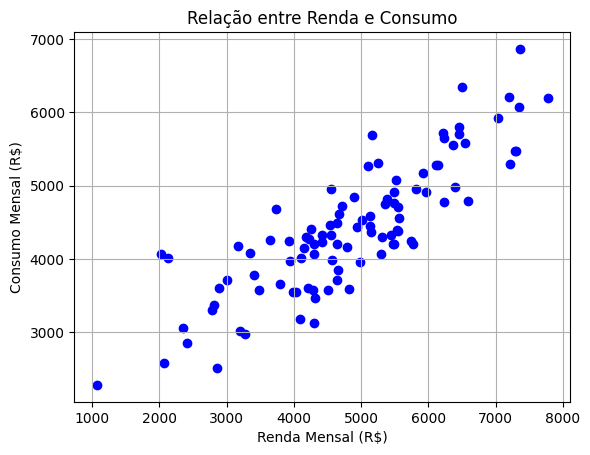

In [8]:
# Visualizar os dados
plt.scatter(df['Renda'], df['Consumo'], color='blue')
plt.xlabel('Renda Mensal (R$)')
plt.ylabel('Consumo Mensal (R$)')
plt.title('Relação entre Renda e Consumo')
plt.grid(True)
plt.show()

Equação da regressão: Consumo = 0.55 * Renda + 1742.48


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


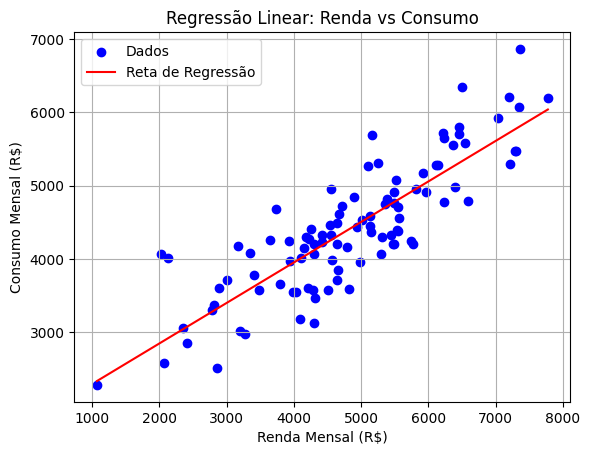

In [9]:
# Modelagem de Regressão Linear
X = df[['Renda']]  # Variável independente precisa ser uma matriz
y = df['Consumo']  # Variável dependente

modelo = LinearRegression()
modelo.fit(X, y)

# Coeficientes da regressão
a = modelo.coef_[0]  # Inclinação
b = modelo.intercept_  # Intercepto

print(f'Equação da regressão: Consumo = {a:.2f} * Renda + {b:.2f}')

# Gerar valores previstos para plotar a reta
renda_range = np.linspace(min(renda), max(renda), 100).reshape(-1,1)
consumo_previsto = modelo.predict(renda_range)

# Plotar dados + reta de regressão
plt.scatter(df['Renda'], df['Consumo'], color='blue', label='Dados')
plt.plot(renda_range, consumo_previsto, color='red', label='Reta de Regressão')
plt.xlabel('Renda Mensal (R$)')
plt.ylabel('Consumo Mensal (R$)')
plt.title('Regressão Linear: Renda vs Consumo')
plt.legend()
plt.grid(True)
plt.show()


**Resumo do Modelo**

In [12]:
# 📊 Resultados principais
print('Inclinação (coeficiente angular):', modelo.coef_[0])
print('Intercepto:', modelo.intercept_)
print('R²:', modelo.score(X, y))

Inclinação (coeficiente angular): 0.5522476132428523
Intercepto: 1742.475848717721
R²: 0.7172213193902389
